# Playing with Minute-Market-Data
### Dan Schmidt's Script Fall 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
from IPython.core.debugger import Tracer
import scipy as sp
import scipy.sparse 
import scipy.sparse.linalg
from sklearn.decomposition import PCA
from sklearn import cluster
%matplotlib inline

### Preprocessing
Read the data in, convert dates to a useful format, and dump it back out for faster hard drive reads later

In [10]:
data_loc = "/media/dan/Storage/market_data/"
store = pd.HDFStore('/media/dan/Storage/market_data.h5')

# read in a symbols file
def get_symbol(symbol, start_date=None, end_date=None, daily=False):
    pickle_file = data_loc+symbol+'/'+symbol+'.pkl'
    if os.path.isfile(pickle_file):
        print("Reading", symbol, "from pickle")
        df = pd.read_pickle(pickle_file)
    else:
        try:
            df = pd.read_csv(data_loc+symbol+'\\'+symbol+'.txt', dtype={'Time': object})
        except:
            print("failed to read in ",symbol)
            return None
        
    # Make a nice date time column
    #df['timestamp'] = df.apply(lambda x: pd.to_datetime(x['Date']+" "+x['Time'][:2]+':'+x['Time'][2:]), axis=1)
    if not os.path.isfile(pickle_file):
        df['timestamp'] = pd.to_datetime(df['Date']+" "+ df['Time'], format="%m/%d/%Y %H%M")
        df.set_index('timestamp', drop=False, inplace=True)
        df.drop(['Date', 'Time'], axis=1, inplace=True)
    
    if start_date and end_date:
        return df[( (df['timestamp'] >= pd.to_datetime(start_date)) & (df['timestamp'] <= pd.to_datetime(end_date)))]
    else:
        return df
    
def get_symbols(syms, start_date, end_date, price='Open', daily=False):
    df = pd.DataFrame(columns=syms)
    for sym in syms:
        sym_df = get_symbol(sym, start_date, end_date)
        if not sym_df is None:
            df[sym] = sym_df[price]
            print(sym, "has been read in")
        else:
            df.drop(sym, axis=1, inplace=True)
    return df

def check_integrity(sym):
    start_time = sym.iloc[-1]['timestamp']
    end_time = sym.iloc[-1]['timestamp']
    print("Start date: ", start_time)
    print('End date: ', end_time)
    print('Number of missing prices: ')
    
    # A good way to check for full data in a trading day
    print(sym.groupby(sym.timestamp.dt.date).count() == 390)

Reading AAPL from pickle


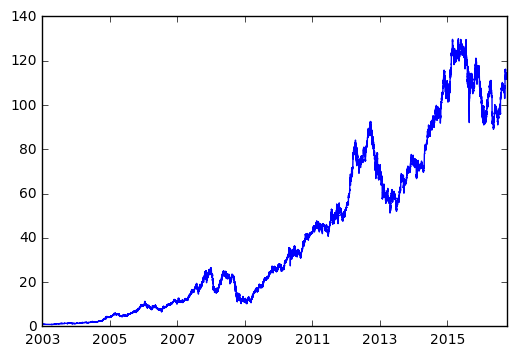

In [12]:
aapl = get_symbol("AAPL")

plt.plot(aapl['Close'])